<a href="https://colab.research.google.com/github/avimec13/project1/blob/master/CNN_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Time Series Forecasting

Import Dependencies

In [1]:
#Importing Libraries
from numpy import array
import numpy as np # linear algebra
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt

In [ ]:
# assign values for train data and validation data, but currently no validation is taking place
power = pd.read_csv('./AAPL.csv').set_index('Time')
Train_p = 0.8
t_idx = int(len(power)*Train_p)
train_set = power[:t_idx]
valid_set = power[t_idx:-3]
test_set = power[-3:]
valid_seq = valid_set.Close.values

Multi-step Convolutional 1D Model 

In [35]:
# univariate multi-step vector-output 1d cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # check if we are beyond the sequence
    if out_end_ix > len(sequence):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

# define input sequence
raw_seq = train_set.Close.values
valid_seq = valid_set.Close.values

# choose a number of time steps, sum cannot exceed len(raw_seq) - 1
n_steps_in, n_steps_out = 3,2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
P,t = split_sequence(valid_seq, n_steps_in, n_steps_out)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
print("Shape of X before reshaping:", X.shape)
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(105, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=5000, verbose=0, validation_data=(P,t))

# demonstrate prediction
x_input = array(test_set.Close.values) #needs to match the n_step_in
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

Shape of X before reshaping: (196, 3)
[[183.81898 184.05914]]


Plot the Real vs Predicted data

In [36]:
m = np.append(array(test_set.Close.values),array(yhat) )
test = array(test_set.Close.values)
print(len(test))

3


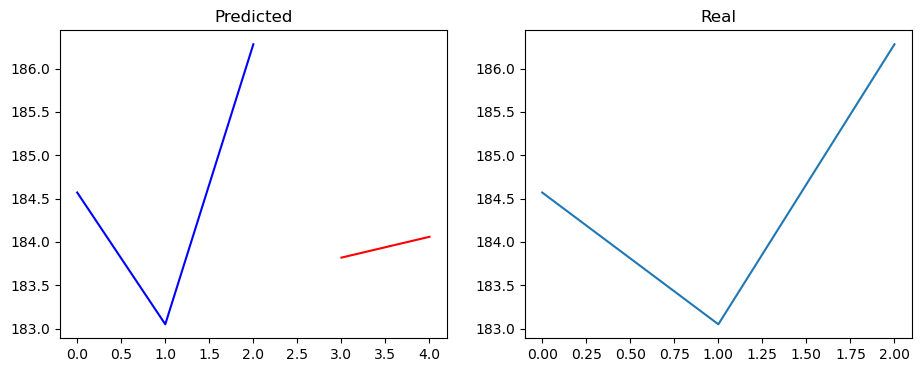

In [37]:
# Assuming m is your predicted values array or list
last_10 = 2
# Calculate the split point
split_point = len(m) - last_10

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# Plot the real values
ax[1].set_title('Real')
ax[1].plot(test_set.Close.values)

# Plot the predicted values
ax[0].set_title('Predicted')
ax[0].plot(m[:split_point], label='Predicted', color='blue')  # Initial part of m
ax[0].plot(range(split_point, len(m)), m[split_point:], label='Last 10 Predicted', color='red')  # Last 50 values of m

plt.show()